<a href="https://colab.research.google.com/github/darshan16011989/CE888/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [7]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.shape

(41188, 21)

In [10]:
df.describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

In [11]:
#Data preprocessing:
#Use LabelEncoder to convert the label into numbers.
#Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)
#Column "duration" must be deleted
#Check if there are any missing values in the dataset. If there are, drop the rows.
#Plot a histogram of the label (i.e., column 'y') and calculate the imbalance in the dataset
#(i.e., divide the number of instances of the minority class by the total length of the dataframe).

In [12]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [13]:
#label encoder
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

In [14]:
# one hot encoding
df_dummies = pd.get_dummies(df)

In [15]:
# to display all columns
pd.options.display.max_columns = None

In [16]:
df_dummies.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  job_admin.  job_blue-collar  \
0          -36.4      4.857       5191.0  0           0                0   
1          -36.4      4.857       5191.0  0           0                0   
2          -36.4      4.857       5191.0  0           0                0   
3          -36.4      4.857       5191.0  0           1                0   
4          -36.4      4.857       5191.0  0           0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              1               0            0   
1                 0              0               0            0   
2                 0              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             1            0               0   
2                  0             1            0               0   
3                  0             0            0               0   
4                  0             1            0               0   

   job_unemployed  job_unknown  marital_divorced  marital_married  \
0               0            0                 0                1   
1               0            0                 0                1   
2               0            0                 0                1   
3               0            0                 0                1   
4               0            0                 0                1   

   marital_single  marital_unknown  education_basic.4y  education_basic.6y  \
0               0                0                   1                   0   
1               0                0                   0                   0   
2               0                0                   0                   0   
3               0                0                   0                   1   
4               0                0                   0                   0   

   education_basic.9y  education_high.school  education_illiterate  \
0                   0                      0                     0   
1                   0                      1                     0   
2                   0                      1                     0   
3                   0                      0                     0   
4                   0                      1                     0   

   education_professional.course  education_university.degree  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   education_unknown  default_no  default_unknown  default_yes  housing_no  \
0                  0           1                0            0           1   
1                  0           0                1            0           1   
2                  0           1                0            0           0   
3                  0           1                0            0           1   
4                  0           1                0            0           1   

   housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  \
0                0            0        1    

In [17]:
#deleting duration column
df_dummies.drop(columns=['duration'],axis=1,inplace=True)

In [18]:
#Check if there are any missing values in the dataset. If there are, drop the rows.
if df_dummies.isnull().sum().sum() == 0:
    print('There are no missing values')
else:
    print('There are missing values')

There are no missing values


In [19]:
df_dummies.shape

(41188, 63)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


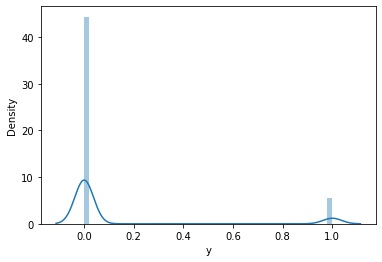

In [20]:
#Plot a histogram of the label (i.e., column 'y') and calculate the imbalance in the dataset 
#(i.e., divide the number of instances of the minority class by the total length of the dataframe).

sns.distplot(df['y'])
plt.show()

In [21]:
#imbalance
(df.y.value_counts()[1]/df.shape[0]) * 100

11.265417111780131

In [22]:
#seperating X and y
X = df_dummies.drop(columns=['y'],axis=1)
y = df_dummies['y']
print(X.shape)
print(y.shape)

(41188, 62)
(41188,)


In [23]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32950, 62)
(32950,)
(8238, 62)
(8238,)


In [24]:
#Report the results of 10-fold stratified cross-validation on the training set using a random forest classifier with 100 
#trees and depth=3. Ensure you're using an appropriate metric (print sorted(sklearn.metrics.SCORERS.keys()) 
#to see what are the valid options and choose one for cross-validation).

RFC = RandomForestClassifier(n_estimators=100, max_depth=3)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [25]:
print(metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [26]:
scores = cross_val_score(RFC, X, y, cv=10)
print(scores)

[0.8873513  0.8873513  0.8873513  0.8873513  0.8873513  0.8873513
 0.8873513  0.37654771 0.88732394 0.33098592]


In [27]:
dummy = DummyClassifier()

In [28]:
dummy.fit(X_train, y_train)

DummyClassifier()

In [29]:
dummy.score(X_train, y_train)

0.8873444613050075

In [30]:
dummy_pred_train = dummy.predict(X_train)
dummy_pred_test = dummy.predict(X_test)
print(metrics.classification_report(y_train, dummy_pred_train))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29238
           1       0.00      0.00      0.00      3712

    accuracy                           0.89     32950
   macro avg       0.44      0.50      0.47     32950
weighted avg       0.79      0.89      0.83     32950



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(metrics.classification_report(y_test, dummy_pred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
model = RandomForestClassifier()

In [33]:
grid = {'n_estimators':[100,200], 'max_features':[7,8,9], 'max_depth':[3,4]}

In [34]:
grid_model = GridSearchCV(estimator=model, param_grid=grid)

In [35]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4], 'max_features': [7, 8, 9],
                         'n_estimators': [100, 200]})

In [36]:
grid_model.best_params_

{'max_depth': 4, 'max_features': 9, 'n_estimators': 200}

In [37]:
#Feature Importance
(pd.DataFrame(RFC.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)).head(3)

Imp
euribor3m         0.162093
nr.employed       0.160765
poutcome_success  0.154289

In [38]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Quiz

In [ ]:
#RFC_1 = RandomForestClassifier(n_estimators=100, max_depth=3)# random_state=60)
#RFC_1.fit(X_train,y_train)

In [ ]:
#rfc1_train_ypred = RFC_1.predict(X_train)
#rfc1_test_ypred = RFC_1.predict(X_test)

In [ ]:
#print(metrics.classification_report(y_train, rfc1_train_ypred))

In [ ]:
#print(metrics.classification_report(y_test, rfc1_test_ypred))

In [39]:
# Q6
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32950, 62)
(32950,)
(8238, 62)
(8238,)


In [40]:
f1_score = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=3), X_train, y_train, cv= 10, scoring="f1")
print(f1_score)
print(round(f1_score.mean(),2))

[0.21973094 0.26008969 0.2095672  0.22273782 0.18309859 0.24657534
 0.33693305 0.24553571 0.25617978 0.25054945]
0.24


In [41]:
f1_score = cross_val_score(RandomForestClassifier(n_estimators=150, max_depth=6), X_train, y_train, cv= 10, scoring="f1")
print(f1_score)
print(round(f1_score.mean(),2))

[0.25596529 0.31196581 0.22717149 0.2875817  0.24017467 0.31397849
 0.39511202 0.25494505 0.27133479 0.28144989]
0.28


In [ ]:
f1_score = cross_val_score(DummyClassifier(strategy='stratified'), X_train, y_train, cv= 10, scoring="f1")
print(f1_score)
print(round(f1_score.mean(),2))

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.23, random_state=50)
print(X_test1.shape)

In [ ]:
f1_score = cross_val_score(RandomForestClassifier(n_estimators=200, max_depth=8), X_train, y_train, cv= 10, scoring="f1")
print(f1_score)
print(round(f1_score.mean(),2))

In [ ]:
f1_score = cross_val_score(RandomForestClassifier(n_estimators=250, max_depth=6), X_train, y_train, cv= 10, scoring="f1")
print(f1_score)
print(round(f1_score.mean(),2))

In [ ]:
#scoring = {'f1_score' : metrics.make_scorer(metrics.f1_score)}

In [ ]:
#RFC_2 = RandomForestClassifier(n_estimators=100, max_depth=6)
#RFC_2.fit(X_train,y_train)
DummyClassifier

In [42]:
model1 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=60)

In [43]:
model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=60)

In [44]:
y_pred = model1.predict(X_train)

In [45]:
metrics.f1_score(y_train,y_pred)

0.42689822294022617

In [ ]:
#Feature Importance
(pd.DataFrame(model1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

In [46]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=60)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=60)

In [47]:
#Feature Importance
(pd.DataFrame(model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

Imp
euribor3m             1.515768e-01
nr.employed           1.340840e-01
pdays                 8.022720e-02
poutcome_success      7.804688e-02
emp.var.rate          7.082507e-02
...                            ...
job_unknown           1.641891e-03
job_entrepreneur      1.530115e-03
marital_unknown       7.331909e-04
education_illiterate  2.007157e-04
default_yes           1.342093e-07

[62 rows x 1 columns]

**Question -10**

In [53]:
grid = {'n_estimators': [300,400],#100],
        'min_samples_leaf': [4,5],
        'min_samples_split': [5,6]}

In [54]:
GridSearchCV_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=5)

In [55]:
GridSearchCV_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [4, 5],
                         'min_samples_split': [5, 6],
                         'n_estimators': [300, 400]})

In [56]:
GridSearchCV_model.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300}

In [57]:
best_grid = GridSearchCV_model.best_estimator_
best_grid

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5,
                       n_estimators=300)

In [58]:
ytest_predict = best_grid.predict(X_test)

**f1 score on test data**

In [59]:
metrics.f1_score(y_test, ytest_predict)

0.3942598187311178

In [60]:
print(metrics.classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.66      0.28      0.39       928

    accuracy                           0.90      8238
   macro avg       0.79      0.63      0.67      8238
weighted avg       0.89      0.90      0.88      8238



In [ ]:
rf_model1 = RandomForestClassifier(n_estimators = 400, min_samples_leaf = 5, min_samples_split = 6)
rf_model1.fit(X_train, y_train)
scores = cross_val_score(rf_model1, X_train, y_train, cv=10)



In [ ]:
y_test_predict = rf_model1.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_test_predict))

In [61]:
import pickle as pkl

outp = open('best_grid.pkl', 'wb')
pkl.dump(best_grid, outp, -1)  # where clf is your classifier
outp.close()

In [62]:
test_csv = X_test.copy()

In [63]:
test_csv['y'] = y_test
test_csv.head()

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
10868   41         1    999         0           1.4          94.465   
29141   45         2    999         0          -1.8          93.075   
23977   38         2    999         0           1.4          93.444   
33175   45         1    999         0          -1.8          92.893   
19349   56         1    999         0           1.4          93.444   

       cons.conf.idx  euribor3m  nr.employed  job_admin.  job_blue-collar  \
10868          -41.8      4.962       5228.1           0                1   
29141          -47.1      1.405       5099.1           1                0   
23977          -36.1      4.963       5228.1           0                0   
33175          -46.2      1.291       5099.1           0                0   
19349          -36.1      4.967       5228.1           0                0   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
10868                 0              0               0            0   
29141                 0              0               0            0   
23977                 0              0               0            0   
33175                 0              0               0            0   
19349                 0              0               0            1   

       job_self-employed  job_services  job_student  job_technician  \
10868                  0             0            0               0   
29141                  0             0            0               0   
23977                  0             0            0               1   
33175                  0             1            0               0   
19349                  0             0            0               0   

       job_unemployed  job_unknown  marital_divorced  marital_married  \
10868               0            0                 1                0   
29141               0            0                 0                1   
23977               0            0                 1                0   
33175               0            0                 0                1   
19349               0            0                 0                1   

       marital_single  marital_unknown  education_basic.4y  \
10868               0                0                   1   
29141               0                0                   0   
23977               0                0                   0   
33175               0                0                   0   
19349               0                0                   1   

       education_basic.6y  education_basic.9y  education_high.school  \
10868                   0                   0                      0   
29141                   0                   0                      1   
23977                   0                   0                      0   
33175                   1                   0                      0   
19349                   0                   0                      0   

       education_illiterate  education_professional.course  \
10868                     0                              0   
29141                     0                              0   
23977                     0                              1   
33175                     0                              0   
19349                     0                              0   

       education_university.degree  education_unknown  default_no  \
10868                            0                  0           1   
29141                            0                  0           1   
23977                            0                  0           1   
33175                            0                  0           1   
19349                            0                  0           0   

       default_unknown  default_yes  housing_no  housing_unknown  housing_yes  \
10868                0            0           0                0            1   
29141                0            0           0                0    

In [64]:
test_csv.to_csv('TestData.csv')

In [ ]:
#df.y.value_counts(normalize=True)

In [ ]:
#from imblearn.over_sampling import SMOTE

In [ ]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
#scale = MinMaxScaler()

In [ ]:
#X_scale = scale.fit_transform(X)

In [ ]:
#X_scale = pd.DataFrame(X_scale,columns=X.columns)

In [ ]:
#sm = SMOTE(random_state=2)
#X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
#y_train_res.value_counts(normalize=True)

In [ ]:
#from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
#Grad_Model = GradientBoostingClassifier(random_state=1)

In [ ]:
#Grad_Model.fit(X_train, y_train)

In [ ]:
#y_test_predict = Grad_Model.predict(X_test)
#metrics.f1_score(y_test,y_test_predict)